In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('Data/StrokeDataset.csv')

In [93]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Exploratory Data Analysis for the Health Dataset

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [98]:
df.groupby('gender')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2897.0,29.065758,8.110783,10.3,23.4,27.8,33.5,78.0
Male,2011.0,28.647936,7.464493,11.5,24.0,28.4,32.5,97.6
Other,1.0,22.400000,NaN,22.4,22.4,22.4,22.4,22.4


In [100]:
df.groupby('gender')['avg_glucose_level'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2994.0,104.057809,43.590651,55.12,76.4325,90.755,112.1825,267.76
Male,2115.0,109.088520,47.434840,55.22,78.3700,93.550,117.7300,271.74
Other,1.0,143.330000,NaN,143.33,143.3300,143.330,143.3300,143.33


In [102]:
df.groupby('gender')['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       1229
        Unknown             836
        formerly smoked     477
        smokes              452
Male    Unknown             708
        never smoked        663
        formerly smoked     407
        smokes              337
Other   formerly smoked       1
Name: count, dtype: int64

In [104]:
df.groupby('gender')['stroke'].value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: count, dtype: int64

In [106]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### There are 201 bmi's that are blank, I am putting the mean of the bmi for these blanks.

In [109]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [111]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [113]:
health = df.copy()

#### Encoded - Here we are encoding the feature columns that need to be encoded into numerical numbers.

In [116]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']

# Fit on the ORIGINAL string columns
oe = OrdinalEncoder()
health[categorical_cols] = oe.fit_transform(health[categorical_cols])

# Now check the mapping
for col, cats in zip(categorical_cols, oe.categories_):
    print(f"{col}:")
    for i, cat in enumerate(cats):
        print(f"  {i} -> {cat}")
    print()

gender:
  0 -> Female
  1 -> Male
  2 -> Other

ever_married:
  0 -> No
  1 -> Yes

work_type:
  0 -> Govt_job
  1 -> Never_worked
  2 -> Private
  3 -> Self-employed
  4 -> children

Residence_type:
  0 -> Rural
  1 -> Urban

smoking_status:
  0 -> Unknown
  1 -> formerly smoked
  2 -> never smoked
  3 -> smokes



In [118]:
health.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.600000,1.0,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.893237,2.0,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.500000,2.0,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.400000,3.0,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.000000,2.0,1
5,56669,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.000000,1.0,1
6,53882,1.0,74.0,1,1,1.0,2.0,0.0,70.09,27.400000,2.0,1
7,10434,0.0,69.0,0,0,0.0,2.0,1.0,94.39,22.800000,2.0,1
8,27419,0.0,59.0,0,0,1.0,2.0,0.0,76.15,28.893237,0.0,1
9,60491,0.0,78.0,0,0,1.0,2.0,1.0,58.57,24.200000,0.0,1


In [120]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   float64
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   float64
 6   work_type          5110 non-null   float64
 7   Residence_type     5110 non-null   float64
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   float64
 11  stroke             5110 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 479.2 KB


In [122]:
health['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [124]:
health['smoking_status'].value_counts()

smoking_status
2.0    1892
0.0    1544
1.0     885
3.0     789
Name: count, dtype: int64

In [126]:
from sklearn.utils import resample

In [128]:
df_major = health[(health['stroke'] == 0)]   # Majority class (no stroke)
df_minor = health[(health['stroke'] == 1)]   # Minority class (stroke)

df_minor_resmapled = resample(
    df_minor,
    replace=True,          # Sample with replacement (bootstrap sampling)
    n_samples=4861,        # Make minority class size equal to majority (here 4861 rows)
    random_state=42        # Fix randomness for reproducibility
)

df_resampled = pd.concat([df_minor_resmapled, df_major])  # Combine into balanced dataset

#### When you use upsampling with resample(..., replace=True), you’re not creating brand-new “fake” data in the sense of inventing new features. You are acutally:

#### We take the existing minority-class rows (stroke = 1).

#### We randomly pick rows from that group, allowing duplicates (replace=True).

#### We add these duplicated rows to the dataset until the minority class matches the majority class size.

#### So technically, we are duplicating real data points rather than generating new synthetic ones. It’s a standard technique to balance datasets for machine learning so the model doesn’t just always predict the majority class.

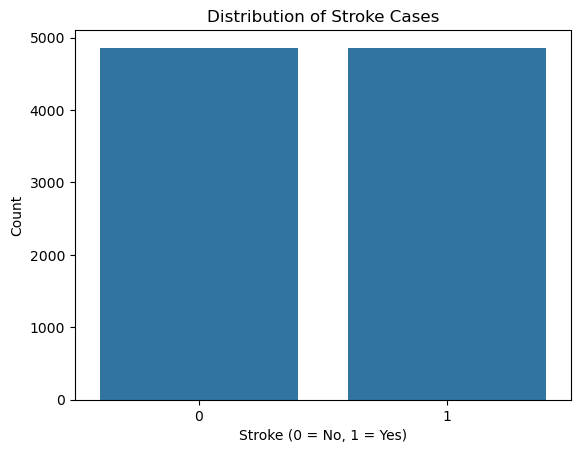

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stroke', data=df_resampled)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Heatmap Explanation:
#### Creates a bar plot to check that the resampling worked. Roughly equal counts of 0 (no stroke) and 1 (stroke). (Above Chart)
#### Creates a heatmap of correlations between all numeric features in the resampled dataset. (Below Heatmap)
#### Lighter (orange) colors represent stronger positive correlations, while darker (purple/black) colors represent stronger negative correlations. Mid-range colors indicate weaker or no correlation.
#### Explores relationships between variables using a correlation heatmap.
#### Age, hypertension, heart disease, glucose level stand out as potentially useful predictors.
#### Variables like residence type or gender don’t show much linear correlation with stroke.

<Axes: >

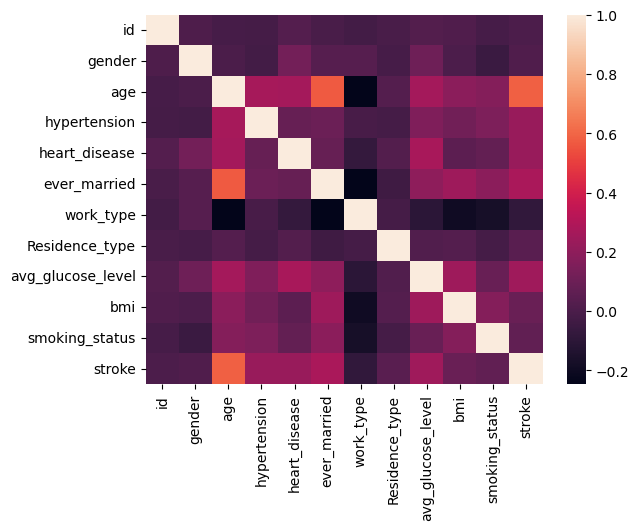

In [134]:
sns.heatmap(df_resampled.corr(), fmt='.2g')

C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

Cross-validation results saved to 'xgboost_cv_results.csv'
Patients predicted to have stroke saved to 'patients_predicted_stroke.csv'

=== Cross-Validated Accuracy ===
Mean Accuracy: 0.8368650755868693
Standard Deviation: 0.0029932431811132833


<Figure size 800x600 with 0 Axes>

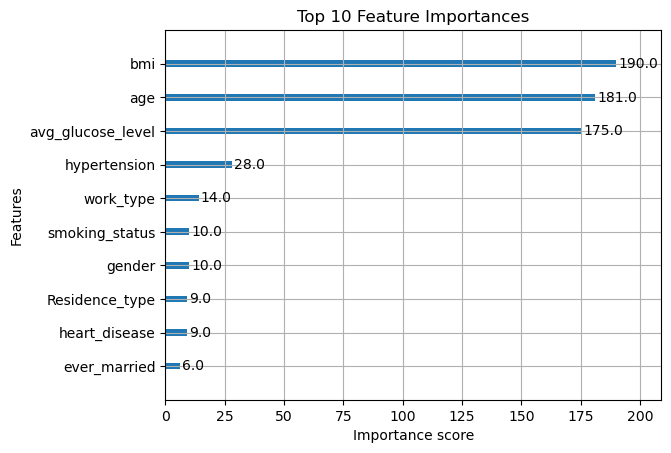

In [136]:
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ------------------------------
# Features, target, and ID
# ------------------------------
ids = df_resampled['id']                     # Keep IDs for output
X = df_resampled.drop(['stroke', 'id'], axis=1)  # Features only
y = df_resampled['stroke']

# ------------------------------
# Initialize XGBoost model
# ------------------------------
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# ------------------------------
# Stratified K-Fold Cross-Validation
# ------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []            # To store fold metrics
all_predictions = []    # To store patient-level predictions
accuracy_list = []
fold = 1

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy and metrics
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store fold metrics
    results.append({
        'Fold': fold,
        'Accuracy': acc,
        'Precision_NoStroke': report['0']['precision'],
        'Recall_NoStroke': report['0']['recall'],
        'F1_NoStroke': report['0']['f1-score'],
        'Precision_Stroke': report['1']['precision'],
        'Recall_Stroke': report['1']['recall'],
        'F1_Stroke': report['1']['f1-score'],
        'TN': cm[0,0],
        'FP': cm[0,1],
        'FN': cm[1,0],
        'TP': cm[1,1]
    })
    
    # Store patient-level predictions with ID
    fold_predictions = X_test.copy()
    fold_predictions['id'] = df_resampled.iloc[test_idx]['id'].values
    fold_predictions['stroke_true'] = y_test.values
    fold_predictions['stroke_pred'] = y_pred
    all_predictions.append(fold_predictions)
    
    fold += 1

# --------------------------
# Save cross-validation metrics
# ------------------------------
results_df = pd.DataFrame(results)

# Round to 2 decimal places
results_df = results_df.round(2)

results_df.to_csv('Data/xgboost_cv_results.csv', index=False)
print("Cross-validation results saved to 'xgboost_cv_results.csv'")

# ------------------------------
# Combine all patient predictions
# ------------------------------
all_predictions_df = pd.concat(all_predictions)

# Filter patients predicted as stroke
stroke_predictions_df = all_predictions_df[all_predictions_df['stroke_pred'] == 1]

# Save to CSV
stroke_predictions_df.to_csv('Data/patients_predicted_stroke.csv', index=False)
print("Patients predicted to have stroke saved to 'patients_predicted_stroke.csv'")

# ------------------------------
# Cross-validated summary
# ------------------------------
print("\n=== Cross-Validated Accuracy ===")
print("Mean Accuracy:", np.mean(accuracy_list))
print("Standard Deviation:", np.std(accuracy_list))

# ------------------------------
# Feature importance (optional)
# ------------------------------
plt.figure(figsize=(8,6))
plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

#### Improved XGBoost Model
| Feature | Original_XGB | Improved_XGB |
|----------|-----------|-----------|
| **Cross-validation folds** | 5 | 5 |
| **Model parameters** | Basic | Tuned & regularized |
| **Imbalance handling** | ❌ | ✅ `scale_pos_weight` |
| **Metrics** | Accuracy only | Adds ROC-AUC + F1 |
| **Confusion matrix** | None | Aggregated across folds |
| **Predicted probabilities** | ❌ | ✅ (for ROC & risk scoring) |
| **Outputs** | Fold results, stroke preds | Richer results, + probabilities |
| **Visualizations** | Feature importances | + Confusion matrix |
| **Runtime** | Faster | Slightly slower |
| **Use case** | Quick baseline check | report-ready model |

Class imbalance ratio (scale_pos_weight): 1.00


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

Cross-validation results saved to 'xgboost_tuned_cv_results.csv'
Patients predicted to have stroke saved to 'patients_predicted_stroke_xgb.csv'

=== Cross-Validated Performance Summary ===
Mean Accuracy: 0.919 ± 0.004
Mean ROC-AUC:  0.971 ± 0.003
Mean F1 Score: 0.925 ± 0.004


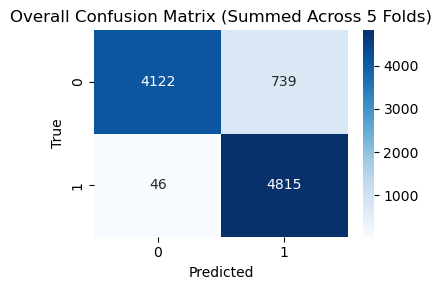

<Figure size 800x600 with 0 Axes>

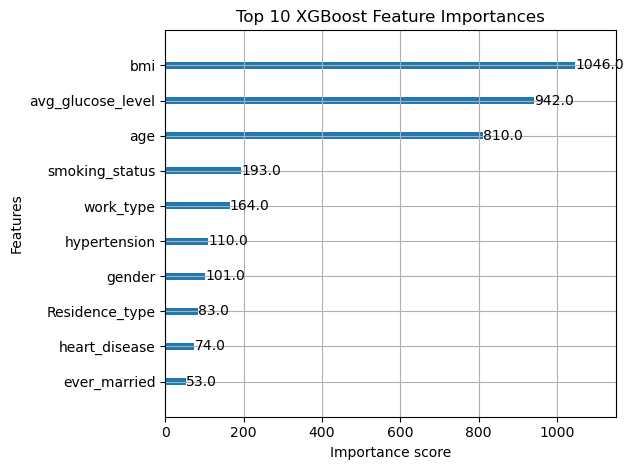

In [139]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Features, target, and ID
# ------------------------------
ids = df_resampled['id']                     
X = df_resampled.drop(['stroke', 'id'], axis=1)  
y = df_resampled['stroke']                  

# ------------------------------
# Compute class imbalance ratio
# ------------------------------
scale_pos_weight = (len(y) - sum(y)) / sum(y)
print(f"Class imbalance ratio (scale_pos_weight): {scale_pos_weight:.2f}")

# ------------------------------
# Initialize tuned XGBoost model
# ------------------------------
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)

# ------------------------------
# Stratified K-Fold Cross-Validation
# ------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
all_predictions = []
accuracy_list, roc_list, f1_list = [], [], []
fold = 1

# For aggregated confusion matrix
cm_total = np.zeros((2, 2))

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Aggregate confusion matrix
    cm_total += cm
    
    accuracy_list.append(acc)
    roc_list.append(roc)
    f1_list.append(f1)
    
    results.append({
        'Fold': fold,
        'Accuracy': acc,
        'ROC_AUC': roc,
        'F1_Score': f1,
        'Precision_NoStroke': report['0']['precision'],
        'Recall_NoStroke': report['0']['recall'],
        'F1_NoStroke': report['0']['f1-score'],
        'Precision_Stroke': report['1']['precision'],
        'Recall_Stroke': report['1']['recall'],
        'F1_Stroke': report['1']['f1-score'],
        'TN': cm[0, 0],
        'FP': cm[0, 1],
        'FN': cm[1, 0],
        'TP': cm[1, 1]
    })
    
    # Store fold-level predictions
    fold_predictions = X_test.copy()
    fold_predictions['id'] = df_resampled.iloc[test_idx]['id'].values
    fold_predictions['stroke_true'] = y_test.values
    fold_predictions['stroke_pred'] = y_pred
    fold_predictions['stroke_pred_proba'] = y_proba
    all_predictions.append(fold_predictions)
    
    fold += 1

# ------------------------------
# Save results and predictions
# ------------------------------
results_df = pd.DataFrame(results).round(3)
results_df.to_csv('Data/xgboost_tuned_cv_results.csv', index=False)
print("Cross-validation results saved to 'xgboost_tuned_cv_results.csv'")

all_predictions_df = pd.concat(all_predictions, ignore_index=True)
stroke_predictions_df = all_predictions_df[all_predictions_df['stroke_pred'] == 1]
stroke_predictions_df.to_csv('Data/patients_predicted_stroke_xgb.csv', index=False)
print("Patients predicted to have stroke saved to 'patients_predicted_stroke_xgb.csv'")

# ------------------------------
# Cross-validated summary
# ------------------------------
print("\n=== Cross-Validated Performance Summary ===")
print(f"Mean Accuracy: {np.mean(accuracy_list):.3f} ± {np.std(accuracy_list):.3f}")
print(f"Mean ROC-AUC:  {np.mean(roc_list):.3f} ± {np.std(roc_list):.3f}")
print(f"Mean F1 Score: {np.mean(f1_list):.3f} ± {np.std(f1_list):.3f}")

# ------------------------------
# Aggregated Confusion Matrix
# ------------------------------
plt.figure(figsize=(4,3))
sns.heatmap(cm_total.astype(int), annot=True, fmt='d', cmap='Blues')
plt.title('Overall Confusion Matrix (Summed Across 5 Folds)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# ------------------------------
# Feature importance
# ------------------------------
plt.figure(figsize=(8,6))
plot_importance(model, max_num_features=10)
plt.title("Top 10 XGBoost Feature Importances")
plt.tight_layout()
plt.show()

### 1. Continuous vs. Binary Features

| Feature                  | Type              | Why It Matters |
|--------------------------|-------------------|----------------|
| `bmi`, `avg_glucose_level`, `age` | **Continuous** | Can be split at **many thresholds** → creates **numerous high-gain splits** (e.g., glucose > 140, age > 65, BMI > 30). |
| `hypertension`, `heart_disease` | **Binary (0/1)** | Only **one possible split** per tree → **limited gain per use**. |

> **Result**: Continuous variables get used in **more trees** and **more splits**, accumulating **higher total gain**.

#### Applying a Random Forest Model As Well for Comparison.

Cross-validation results saved to 'rf_classifier_cv_results.csv'
Patients predicted to have stroke saved to 'patients_predicted_stroke_rf_classifier.csv'

=== Cross-Validated Performance Summary ===
Mean Accuracy: 0.782 ± 0.003
Mean ROC-AUC:  0.858 ± 0.006


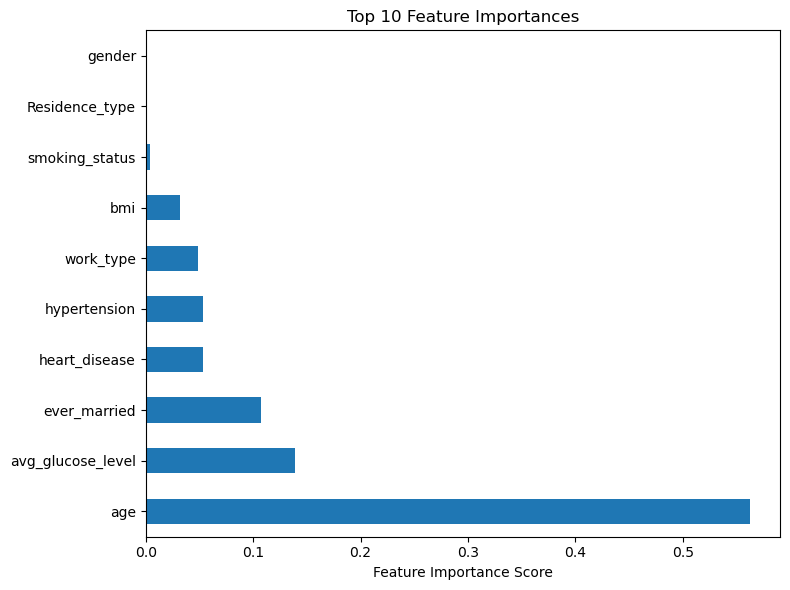

In [148]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)
import matplotlib.pyplot as plt

# ------------------------------
# Features, target, and ID
# ------------------------------
ids = df_resampled['id']                     # Keep IDs for output
X = df_resampled.drop(['stroke', 'id'], axis=1)  # Features only
y = df_resampled['stroke']                  # Target (binary: 0 or 1)

# ------------------------------
# Initialize Random Forest Classifier model
# ------------------------------
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# ------------------------------
# Stratified K-Fold Cross-Validation
# ------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []            # To store fold metrics
all_predictions = []    # To store patient-level predictions
accuracy_list, roc_list = [], []
fold = 1

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of stroke
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy_list.append(acc)
    roc_list.append(auc)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store fold metrics
    results.append({
        'Fold': fold,
        'Accuracy': acc,
        'ROC_AUC': auc,
        'Precision_NoStroke': report['0']['precision'],
        'Recall_NoStroke': report['0']['recall'],
        'F1_NoStroke': report['0']['f1-score'],
        'Precision_Stroke': report['1']['precision'],
        'Recall_Stroke': report['1']['recall'],
        'F1_Stroke': report['1']['f1-score'],
        'TN': cm[0,0],
        'FP': cm[0,1],
        'FN': cm[1,0],
        'TP': cm[1,1]
    })
    
    # Store patient-level predictions with probabilities
    fold_predictions = X_test.copy()
    fold_predictions['id'] = df_resampled.iloc[test_idx]['id'].values
    fold_predictions['stroke_true'] = y_test.values
    fold_predictions['stroke_pred'] = y_pred
    fold_predictions['stroke_pred_proba'] = y_pred_proba
    fold_predictions['stroke_pred_percent'] = (y_pred_proba * 100).round(2)
    all_predictions.append(fold_predictions)
    
    fold += 1

# --------------------------
# Save cross-validation metrics
# ------------------------------
results_df = pd.DataFrame(results).round(3)
results_df.to_csv('Data/rf_classifier_cv_results.csv', index=False)
print("Cross-validation results saved to 'rf_classifier_cv_results.csv'")

# ------------------------------
# Combine all patient predictions
# ------------------------------
all_predictions_df = pd.concat(all_predictions, ignore_index=True)

# Filter patients predicted as stroke
stroke_predictions_df = all_predictions_df[all_predictions_df['stroke_pred'] == 1]

# Save to CSV
stroke_predictions_df.to_csv('Data/patients_predicted_stroke_rf_classifier.csv', index=False)
print("Patients predicted to have stroke saved to 'patients_predicted_stroke_rf_classifier.csv'")

# ------------------------------
# Cross-validated summary
# ------------------------------
print("\n=== Cross-Validated Performance Summary ===")
print(f"Mean Accuracy: {np.mean(accuracy_list):.3f} ± {np.std(accuracy_list):.3f}")
print(f"Mean ROC-AUC:  {np.mean(roc_list):.3f} ± {np.std(roc_list):.3f}")

# ------------------------------
# Feature importance
# ------------------------------
plt.figure(figsize=(8,6))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()

### Now the Python Script does the following-
#### Introduces probability-based predictions for interpretability.

#### Tracks ROC-AUC for better discrimination assessment.

#### Uses stratified folds for fair evaluation of imbalanced classes.

#### Mean Accuracy: The model correctly classifies about 78% of all cases.

#### Mean ROC-AUC: 0.858, 0.85+ means the model is reliably distinguishing stroke vs. non-stroke patients.

#### The reason why smoking has such a low feature importance is partyly due to 989 patients have a smoking question of unknown (Some of these patients are included multiple times due to the resampling process).

### Which Model is better?

#### The XGBoost model outperformed the Random Forest classifier with notably higher validation metrics:

#### Mean Accuracy: 0.919 vs. 0.782

#### Mean ROC-AUC: 0.971 vs. 0.858

#### This improvement reflects XGBoost’s ability to learn more efficiently and generalize better across folds.

#### The higher ROC-AUC indicates XGBoost is better at distinguishing between stroke and non-stroke cases — a key goal for medical prediction.
#### Its superior accuracy and F1-score demonstrate more reliable classification overall, making it the preferred model for this stroke risk analysis.